In [64]:
class SLP:
    
    def __init__(self,learning_rate=0.001,epochs=2000,n_h=4):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost = []
        self.n_h = 4
        self.n_x = None
        self.n_y = 1
        
    def sigmoid(self,z):
        a = 1 / (1+np.exp(-z))
        return a
    
    def tanh(self,z):
        a = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
        return a
        
    def initialize_weights(self):
        self.w1 = np.random.randn(self.n_h,self.n_x) * 0.01
        self.b1 = np.zeros((self.n_h,1))
        
        self.w2 = np.random.randn(self.n_y,self.n_h) * 0.01
        self.b2 = np.zeros((self.n_y,1))
        
    def forward_propagation(self):
        self.z1 = np.dot(self.w1,self.x_train) + self.b1
        self.a1 = self.tanh(self.z1)

        self.z2 = np.dot(self.w2,self.a1) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
    def compute_cost(self):
        self.cost.append((-1*(np.sum(self.y_train*np.log(self.a2)+(1-self.y_train)*np.log(1-self.a2))))/self.m)
        
    def update_weights(self):
        self.dz2 = self.a2 - self.y_train
        self.dw2 = np.dot(self.dz2,self.a1.T)/self.m
        self.db2 = np.sum(self.dz2,axis = 1 ,keepdims = True)
        
        self.dz1 = np.dot(self.w2.T,self.dz2) * (1-np.power(self.a1,2))
        self.dw1 = np.dot(self.dz1,self.x_train.T)/self.m
        self.db1 = np.sum(self.dz1,axis = 1, keepdims = True)
        
        self.w1 = self.w1 - self.learning_rate * self.dw1
        self.w2 = self.w2 - self.learning_rate * self.dw2
        self.b1 = self.b1 - self.learning_rate * self.db1
        self.b2 = self.b2 - self.learning_rate * self.db2
        
    def fit(self,x,y):
        x_train = x /255
        self.m = x_train.shape[0]
        self.x_train = x_train.reshape(x_train.shape[0],-1).T
        
        self.n_x = self.x_train.shape[0]
        
        self.y_train = y.reshape(1,y.shape[0])
        self.initialize_weights()
        
        for i in range(self.epochs):
            print(f"epoch-{i+1}")
            self.forward_propagation()
            self.compute_cost()
            self.update_weights()

In [65]:
import h5py
hf = h5py.File('train_catvnoncat.h5','r')
X_train = np.array(hf['train_set_x'])

Y_train = np.array(hf['train_set_y'])

In [102]:
model = SLP(epochs = 20,n_h=2)
model.fit(X_train,Y_train)

epoch-1
epoch-2
epoch-3
epoch-4
epoch-5
epoch-6
epoch-7
epoch-8
epoch-9
epoch-10
epoch-11
epoch-12
epoch-13
epoch-14
epoch-15
epoch-16
epoch-17
epoch-18
epoch-19
epoch-20


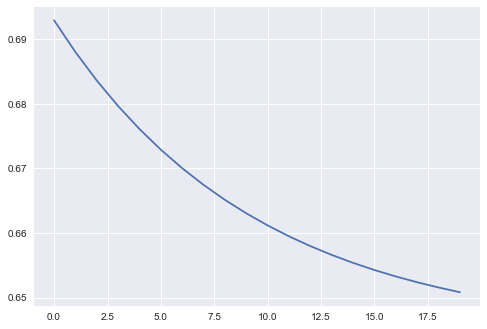

In [103]:
import matplotlib.pyplot as plt
epochs=[i for i in range(model.epochs)]
plt.style.use('seaborn')
plt.plot(epochs,model.cost)

In [104]:
print(min(model.cost))

0.6508327826546715
